In [55]:
import itertools
import numpy as np

import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [59]:
class CustomLinearRegression():
        
    def __init__( self, learning_rate = 0.005, max_iter = 100 ):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
    
    def fit( self, X, y ):
        
        #X = X.as_matrix()
        y = y.as_matrix().ravel()
        
        # Number of features + intercept
        num_features = X.shape[ 1 ]
        # Number of instances
        num_instances = X.shape[ 0 ]
        
        # Coeficients initialization
        self.W = np.zeros( num_features )
        
        # Iterations
        for i in range( self.max_iter ):
            x_index = np.random.randint( num_instances )
            g = np.dot( self.W, X[ x_index ].T )
            e = g - y[ x_index ]
            self.W = self.W - self.learning_rate * e * X[ x_index ]
    
    def predict( self, X ):
        #X = X.as_matrix()
        g = np.dot( self.W, X.T )
        return g.ravel()

# Loading dataset

In [2]:
# https://archive.ics.uci.edu/ml/datasets/Wine+Quality
winequality_white_df = pd.read_csv( './data/winequality-white.csv', sep = ';' )

In [3]:
winequality_white_df.drop_duplicates( inplace = True )

In [4]:
winequality_white_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
winequality_white_df.shape

(3961, 12)

In [6]:
winequality_white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [7]:
#pandas_profiling.ProfileReport( winequality_white_df )

# Splitting dataset

In [8]:
# Se parte el dataset de entrenamiento (TOTAL) del de prueba
winequality_white_train_df, winequality_white_test_df =  train_test_split( winequality_white_df, test_size = 2000 )

In [9]:
winequality_white_train_df.shape

(1961, 12)

In [10]:
winequality_white_test_df.shape

(2000, 12)

# Model Fitting

In [11]:
features = winequality_white_test_df.columns[ : -1 ].tolist()
len( features )

11

In [43]:
def model_iteration( model, train_df, test_df, features, target ):
    
    # Creación del pipeline
    model = Pipeline( [
        ( 'scaler', StandardScaler() ),
        ( 'model', model )
    ] )
    
    # Entrenamiento del modelo
    model.fit( train_df[ features ], train_df[ target ] )
    
    # Generación de las predicciones
    train_preds = model.predict( train_df[ features ] )
    test_preds = model.predict( test_df[ features ] )
    
    # Cálculo del RMSE de entrenamiento y prueba
    rmse_train = np.sqrt( mean_squared_error( train_df[ target ], train_preds ) )
    rmse_test = np.sqrt( mean_squared_error( test_df[ target ], test_preds ) )
    
    return rmse_train, rmse_test

In [56]:
sklearn_model = SGDRegressor( random_state = 1 )

sklearn_train_instances = []
sklearn_rmse_train = []
sklearn_rmse_test = []

for step in range( 100, winequality_white_train_df.shape[ 0 ], 100 ):
    
    #print( step )
    sklearn_train_instances.append( step )
                                   
    # Se crea el dataset de entrenamiento para la iteración
    winequality_white_train_step_df, _ = train_test_split( winequality_white_train_df, train_size = step )
    
    rmse_train, rmse_test = model_iteration( sklearn_model, winequality_white_train_step_df, winequality_white_test_df, features, 'quality' )
    
    sklearn_rmse_train.append( rmse_train )
    sklearn_rmse_test.append( rmse_test )

C:\Users\fc.pena\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\fc.pena\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\fc.pena\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\fc.pena\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureW

In [60]:
custom_model = CustomLinearRegression()

custom_train_instances = []
custom_rmse_train = []
custom_rmse_test = []

for step in range( 100, winequality_white_train_df.shape[ 0 ], 100 ):
    
    #print( step )
    custom_train_instances.append( step )
    
    # Se crea el dataset de entrenamiento para la iteración
    winequality_white_train_step_df, _ = train_test_split( winequality_white_train_df, train_size = step )
    
    rmse_train, rmse_test = model_iteration( custom_model, winequality_white_train_step_df, winequality_white_test_df, features, 'quality' )
    
    custom_rmse_train.append( rmse_train )
    custom_rmse_test.append( rmse_test )

C:\Users\fc.pena\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\fc.pena\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\fc.pena\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\fc.pena\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\fc.pena\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement tr

Text(0.5,1,'Custom')

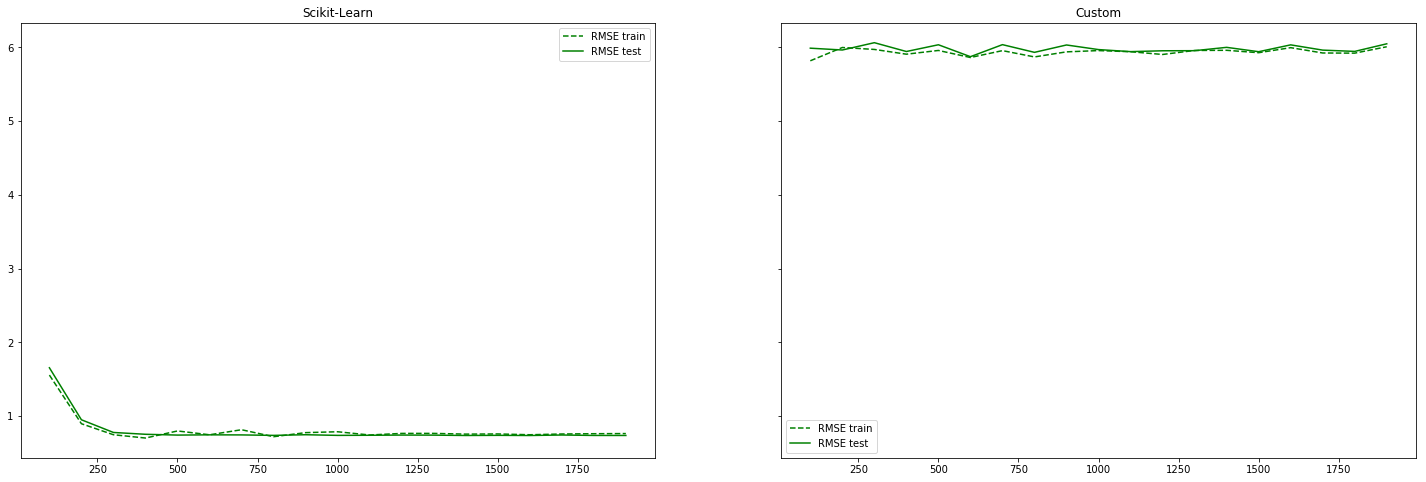

In [61]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = ( 25, 8 ) )

ax1.plot( sklearn_train_instances, sklearn_rmse_train, '--g', label = 'RMSE train' )
ax1.plot( sklearn_train_instances, sklearn_rmse_test, '-g', label = 'RMSE test' )
ax1.legend()
ax1.set_title( 'Scikit-Learn' )

ax2.plot( custom_train_instances, custom_rmse_train, '--g', label = 'RMSE train' )
ax2.plot( custom_train_instances, custom_rmse_test, '-g', label = 'RMSE test' )
ax2.legend()
ax2.set_title( 'Custom' )

In [ ]:
4/0.02*np.log(4/0.05)